In [3]:
# %matplotlib inline
import matplotlib.pyplot as plt
import os, re
import time
import numpy as np
import pandas as pd
from scipy.io import savemat, loadmat
from scipy.fftpack import fft, ifft

import stfft
import general
import eegFilter
from eegAnalysis import EEGAnalysis

from tqdm import tqdm

datadir = "../../Data"
resultdir = "../../Result/"
patientName = "Chen Zhou"
fs = 2000

targetfiles = "180903-2-5"
chidx = 106
cutoffband = "gamma"
lowcut, highcut = eegFilter.getbandrange(cutoffband)

print('patient:', patientName,
      '\nfile:', targetfiles, 
      '\nchannel:',chidx+1, 
      '\nbandpass:', cutoffband)
analysis = EEGAnalysis(
        datadir = datadir,
        resultdir = resultdir,
        patientname = patientName,
        expname = targetfiles,
        fs=fs,
        roi=(-2,5))

patient: Chen Zhou 
file: 180903-2-5 
channel: 107 
bandpass: gamma


---
import all the entrain trials across channels having photoreaction in one day

CPU times: user 439 ms, sys: 49.3 ms, total: 489 ms
Wall time: 491 ms


<Figure size 432x288 with 0 Axes>

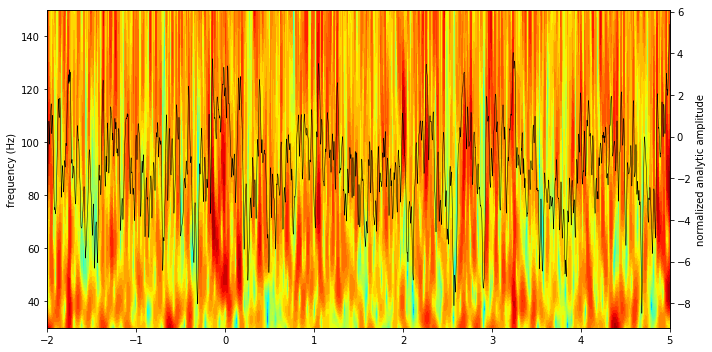

In [15]:
frange = np.logspace(np.log10(lowcut), np.log10(highcut), 40)
tspec = np.linspace(analysis.roi[0], analysis.roi[-1], (analysis.roi[1] - analysis.roi[0])*analysis.fs)
cue_onset = analysis.markers["entrain"][0][0][0,:]

photoreactionch = [1,2,3]
ch_entrain = general.split_datawithmarker(analysis.channels[0, :], cue_onset, 
                                        analysis.roi, analysis.fs)

for chidx in photoreactionch:
    ch_split = general.split_datawithmarker(analysis.channels[chidx, :], cue_onset, 
                                        analysis.roi, analysis.fs)
    ch_entrain = np.vstack((ch_entrain, ch_split))
ch_entrain = ch_entrain[2:,:]

%time pxx = stfft.dwt_tf(ch_split, analysis.fs, frange, reflection=True)

plt.figure()
fig, ax1 = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

ax1.contourf(np.linspace(-2,5,3500), frange, pxx[:,::4], 40, cmap=plt.get_cmap("jet"))
ax1.set_xlim([tspec[0], tspec[-1]])
ax1.set_ylabel("frequency (Hz)")

ax2 = ax1.twinx()
ax2.plot(tspec, np.mean(pxx,0),'k', linewidth=0.5)
ax2.set_ylabel("normalized analytic amplitude")

fig.tight_layout()
plt.show()

# tf domain
# plt.contourf(np.linspace(-2,5,3500), frange, pxx[:,::4], 40, cmap=plt.get_cmap("jet"))
# # plt.clim([0,4])
# plt.show()

plt.close('all')